# Assignment 3: Feature Detection and Description

## Set Up

In [30]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
#from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from a3utils import *
from sift import get_features
from harris import get_interest_points
from IPython.core.debugger import set_trace


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the images

In [56]:
norte = load_image('../data/Notre Dame/921919841_a30df938f2_o.jpg')
gaudi = load_image('/home/rohan/CMI/SEM_4/Computer_Vision/Assignment_3/Feature_Detection_Decscription/Feature_Detection_Decscription/data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
chess = load_image('/home/rohan/CMI/SEM_4/Computer_Vision/Assignment_3/Feature_Detection_Decscription/Feature_Detection_Decscription/data/Test_images/chess-board-layout-sb0-prints.jpg')
mount = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')

### Harris corner detection 
#### For different images

### Norte Dame

In [57]:
scale_factor = 0.5
norte = cv2.resize(norte, (0, 0), fx=scale_factor, fy=scale_factor)
norte_bw = cv2.cvtColor(norte, cv2.COLOR_RGB2GRAY)

feature_width = 40 #width and height of each local feature, in pixels.

In [ ]:
f, axarr = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(hill)
axarr[1].imshow(hill_gray_scale)
axarr[0].set_title("Original")
axarr[1].set_title('In Gray Scale')

Shape of b/w image: (1024, 768)
Feature width taken: 40
No of interest Points: 1278
No of interest Points based on feature width: 1248
ANMS done..  Can choose the number of points.
1248 corners in image


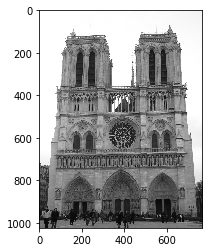

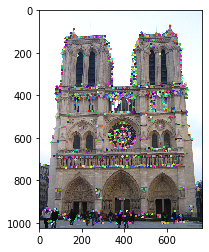

In [4]:
print("Shape of b/w image:", norte_bw.shape)
print("Feature width taken:",feature_width)
norte_x, norte_y= get_interest_points(norte_bw, feature_width, window =2, ANMS =True)
plt.figure(); plt.imshow(norte_bw, cmap = "gray")

# Visualize the interest points
c = show_interest_points(norte, norte_y, norte_x)

plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(norte_x)))

###  Episcipal Gaudi

In [28]:
scale_factor = 0.5
gaudi = cv2.resize(gaudi, (0, 0), fx=scale_factor, fy=scale_factor)
gaudi_bw = cv2.cvtColor(gaudi, cv2.COLOR_RGB2GRAY)

feature_width = 50 # width and height of each local feature, in pixels. 

Shape of b/w image: (600, 800)
Feature width taken: 50
No of interest Points: 894
No of interest Points based on feature width: 837
ANMS done..  Can choose the number of points.
837 corners in image


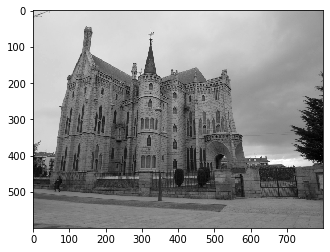

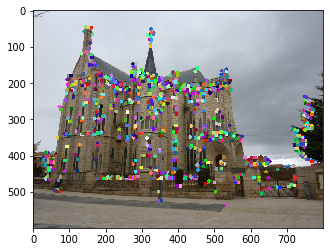

In [29]:
print("Shape of b/w image:", gaudi_bw.shape)
print("Feature width taken:",feature_width)

gaudi_x, gaudi_y= get_interest_points(gaudi_bw, feature_width = 50, window = 2)

plt.figure(); plt.imshow(gaudi_bw, cmap = "gray")

# Visualize the interest points
c = show_interest_points(gaudi, gaudi_y, gaudi_x)

plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(gaudi_x)))

### Chess Board

In [9]:
scale_factor = 1
chess = cv2.resize(chess, (0, 0), fx=scale_factor, fy=scale_factor)
chess_bw = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

Shape of b/w image: (700, 700)
Feature width taken: 16
No of interest Points: 638
No of interest Points based on feature width: 638
ANMS done..  Can choose the number of points.
638 corners in image


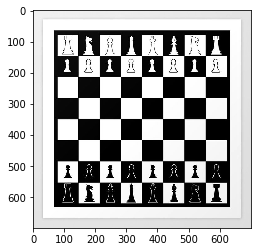

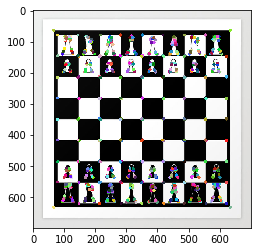

In [10]:
print("Shape of b/w image:", chess_bw.shape)
print("Feature width taken:",feature_width)


chess_x, chess_y= get_interest_points(chess_bw, feature_width, window =1)

plt.figure(); plt.imshow(chess_bw, cmap = "gray")

# Visualize the interest points
c = show_interest_points(chess, chess_y, chess_x)
plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(chess_x)))

### Mount Rushmore

In [11]:
scale_factor = 0.5
mount = cv2.resize(mount, (0, 0), fx=scale_factor, fy=scale_factor)
mount_bw = cv2.cvtColor(mount, cv2.COLOR_RGB2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

Shape of b/w image: (972, 1296)
Feature width taken: 16
No of interest Points: 2601
No of interest Points based on feature width: 2517
ANMS done..  Can choose the number of points.
2517 corners in image


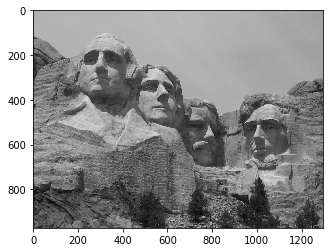

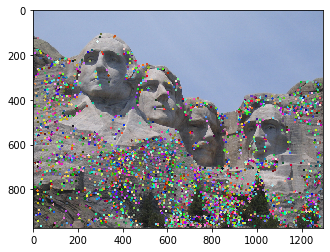

In [12]:
print("Shape of b/w image:", mount_bw.shape)
print("Feature width taken:",feature_width)

mount_x, mount_y= get_interest_points(mount_bw, feature_width,window =3)
plt.figure(); plt.imshow(mount_bw, cmap = "gray")

# Visualize the interest points
c = show_interest_points(mount, mount_y, mount_x)

plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(mount_x)))

## Create feature vectors at each interest point

### For Norte Dame

In [13]:
## Here feature width of 16 is used
norte_features = get_features(norte_bw, norte_x, norte_y, 16) 

#### Shape

In [15]:
norte_features.shape

(1248, 128)

### One sift vector

In [32]:
## Print a 128 vector for a random interest point
norte_features[88]

array([0.17216713, 0.13005355, 0.31042134, 0.15179443, 0.03337878,
       0.01310961, 0.01289985, 0.17617532, 0.18959903, 0.14565179,
       0.29731289, 0.14306868, 0.03072787, 0.01744093, 0.1395763 ,
       0.03662251, 0.12302121, 0.01433088, 0.30095425, 0.14381693,
       0.02789559, 0.03355443, 0.22023069, 0.13619602, 0.18344594,
       0.00637594, 0.11947243, 0.08280906, 0.0262816 , 0.08291451,
       0.28676834, 0.21193218, 0.19864679, 0.12935717, 0.31547161,
       0.15631831, 0.        , 0.        , 0.00925901, 0.1909471 ,
       0.26050538, 0.17697129, 0.3032943 , 0.1506968 , 0.        ,
       0.00413585, 0.09277822, 0.01161817, 0.17781718, 0.10726839,
       0.30777101, 0.15876231, 0.        , 0.01723601, 0.18744557,
       0.04369953, 0.27107306, 0.11939041, 0.13047783, 0.082359  ,
       0.        , 0.08111424, 0.25341589, 0.06216956, 0.2475441 ,
       0.11435094, 0.30122741, 0.13157496, 0.        , 0.        ,
       0.00681248, 0.19849011, 0.28135946, 0.21295573, 0.30711

### For Chess Board

In [16]:
chess_features = get_features(chess_bw, chess_x, chess_y, 16)

#### Shape

In [35]:
chess_features.shape

(638, 128)

### One sift vector

In [47]:
## Print a 128 vector for a random interest point
chess_features[100]

array([3.16957679e-01, 3.10618306e-01, 5.38139459e-02, 5.57541962e-02,
       5.39141957e-02, 9.72262791e-02, 2.77138184e-02, 8.40015796e-02,
       1.80831036e-01, 3.53091456e-01, 1.60578751e-01, 9.27877679e-02,
       1.04095633e-01, 1.02376582e-01, 0.00000000e+00, 6.23877342e-03,
       8.73010262e-02, 3.33605166e-01, 6.63328948e-02, 2.93301547e-01,
       1.68379859e-01, 4.81455438e-02, 0.00000000e+00, 2.93396334e-03,
       0.00000000e+00, 5.41084342e-02, 2.16322744e-01, 5.72412413e-01,
       1.34242636e-01, 2.29137732e-02, 0.00000000e+00, 0.00000000e+00,
       1.57439436e-01, 5.00870969e-01, 1.52789985e-01, 1.00085070e-01,
       2.57350243e-02, 4.89969121e-02, 0.00000000e+00, 1.40826042e-02,
       4.05235220e-02, 5.25093959e-01, 5.23870151e-02, 1.04007601e-01,
       7.98464884e-02, 1.98141414e-01, 0.00000000e+00, 0.00000000e+00,
       2.07493497e-01, 1.15983811e-01, 8.73341797e-02, 2.25245023e-01,
       1.57962071e-01, 2.05981420e-01, 0.00000000e+00, 0.00000000e+00,
      

### For Gaudi

In [23]:
gaudi_features = get_features(gaudi_bw, gaudi_x, gaudi_y, 16)

#### Shape

In [48]:
gaudi_features.shape

(837, 128)

### One sift vector

In [49]:
## Print a 128 vector for a random interest point
gaudi_features[200]

array([0.13070053, 0.02808888, 0.13011398, 0.24981294, 0.14167412,
       0.13151461, 0.11319256, 0.07490238, 0.09873317, 0.02219257,
       0.12641138, 0.26227824, 0.12725605, 0.10573916, 0.06702458,
       0.19036485, 0.0910912 , 0.08582079, 0.17061734, 0.18574519,
       0.06850002, 0.08158465, 0.12870783, 0.18793297, 0.1168604 ,
       0.076919  , 0.19510308, 0.19372867, 0.03750545, 0.07312226,
       0.11465959, 0.19210154, 0.08375568, 0.02171066, 0.1011822 ,
       0.16594151, 0.228989  , 0.21259287, 0.1567848 , 0.02904328,
       0.05818309, 0.01802243, 0.1007464 , 0.15965678, 0.21167926,
       0.18633772, 0.08225171, 0.18312262, 0.0568276 , 0.06772086,
       0.11261773, 0.10162716, 0.12499779, 0.15237305, 0.19346117,
       0.19037464, 0.05323961, 0.06726913, 0.14443412, 0.14211689,
       0.09018103, 0.1432211 , 0.1817381 , 0.17780002, 0.07078813,
       0.08211572, 0.16363792, 0.13065899, 0.19647648, 0.17705714,
       0.12664418, 0.05262143, 0.05094652, 0.08580595, 0.15654